In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import statsmodels.formula as smf
from seaborn import load_dataset
import statsmodels.api as sm
import statsmodels.formula.api as sm

# Creacion de dataframes

In [2]:
## Creamos los dataframes de los datos que seran necesarios para la construccion del modelo ##

df_hdi = pd.read_csv('hdi.csv') ## Obtenido de la tarea 2
df_fallecidos = pd.read_csv('DefuncionesDEIS_confirmadosPorComuna.csv') ## Obtenido del Min de Ciencias

## Para el conteo de vacunas administradas utilizaremos el conteo de la 1era y 2da dosis ##

df_vacunas1eradosis = pd.read_csv('vacunacion_comuna_1eraDosis.csv') ## Obtenido del Min de Ciencias
df_vacunas2dadosis = pd.read_csv('vacunacion_comuna_2daDosis.csv') ## Obtenido del Min de Ciencias

In [3]:
df_hdi

,comuna,LEI,II,EI,idh,HDI
0,13101,0.791672,0.873137,0.924099,0.807,0.861222
1,13102,0.782817,0.800343,0.713499,0.743,0.764616
2,13103,0.752447,0.750382,0.657961,0.683,0.718874
3,13104,0.784872,0.760697,0.705426,0.707,0.749584
4,13105,0.777236,0.780019,0.673876,0.711,0.742015
5,13106,0.790810,0.784378,0.729145,0.735,0.767604
6,13107,0.726330,0.775631,0.641707,0.737,0.712375
7,13108,0.821551,0.751105,0.722493,0.709,0.763935
8,13109,0.856570,0.835740,0.860235,0.775,0.850780
9,13110,0.773094,0.824255,0.791155,0.804,0.795888


In [4]:
df_fallecidos

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,...,2021-04-19,2021-04-20,2021-04-21,2021-04-22,2021-04-23,2021-04-24,2021-04-25,2021-04-26,2021-04-27,2021-04-28
0,Arica y Parinacota,15,Arica,15101.0,247552.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,2.0,3.0,0.0,0.0,0.0,1.0,2.0,2.0
1,Arica y Parinacota,15,Camarones,15102.0,1233.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Arica y Parinacota,15,General Lagos,15202.0,810.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Arica y Parinacota,15,Putre,15201.0,2515.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Arica y Parinacota,15,Desconocido Arica y Parinacota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,Magallanes y la Antartica,12,Rio Verde,12103.0,211.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
358,Magallanes y la Antartica,12,San Gregorio,12104.0,681.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
359,Magallanes y la Antartica,12,Timaukel,12303.0,282.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
360,Magallanes y la Antartica,12,Torres del Paine,12402.0,1021.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df_vacunas1eradosis

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,...,2021-04-26,2021-04-27,2021-04-28,2021-04-29,2021-04-30,2021-05-01,2021-05-02,2021-05-03,2021-05-04,2021-05-05
0,Arica y Parinacota,15,Arica,15101.0,247552.0,0.0,0.0,0.0,0.0,0.0,...,601.0,613.0,566.0,396.0,442.0,2.0,0.0,857.0,787.0,917.0
1,Arica y Parinacota,15,Camarones,15102.0,1233.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,9.0,1.0,0.0,0.0,0.0,7.0,7.0,0.0
2,Arica y Parinacota,15,General Lagos,15202.0,810.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Arica y Parinacota,15,Putre,15201.0,2515.0,0.0,0.0,0.0,0.0,0.0,...,5.0,2.0,9.0,1.0,1.0,0.0,0.0,3.0,14.0,9.0
4,Arica y Parinacota,15,Desconocido Arica y Parinacota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,Magallanes y la Antartica,12,Rio Verde,12103.0,211.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
358,Magallanes y la Antartica,12,San Gregorio,12104.0,681.0,0.0,0.0,0.0,0.0,0.0,...,1.0,6.0,1.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0
359,Magallanes y la Antartica,12,Timaukel,12303.0,282.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
360,Magallanes y la Antartica,12,Torres del Paine,12402.0,1021.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df_vacunas2dadosis

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,...,2021-04-26,2021-04-27,2021-04-28,2021-04-29,2021-04-30,2021-05-01,2021-05-02,2021-05-03,2021-05-04,2021-05-05
0,Arica y Parinacota,15,Arica,15101.0,247552.0,0.0,0.0,0.0,0.0,0.0,...,1567.0,1627.0,1296.0,1048.0,373.0,0.0,0.0,892.0,1059.0,715.0
1,Arica y Parinacota,15,Camarones,15102.0,1233.0,0.0,0.0,0.0,0.0,0.0,...,2.0,3.0,0.0,2.0,1.0,0.0,1.0,7.0,3.0,1.0
2,Arica y Parinacota,15,General Lagos,15202.0,810.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,3.0,2.0,2.0,0.0,0.0,0.0,0.0,3.0
3,Arica y Parinacota,15,Putre,15201.0,2515.0,0.0,0.0,0.0,0.0,0.0,...,15.0,10.0,6.0,12.0,7.0,0.0,0.0,8.0,7.0,15.0
4,Arica y Parinacota,15,Desconocido Arica y Parinacota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,Magallanes y la Antartica,12,Rio Verde,12103.0,211.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,6.0,2.0,4.0,1.0,0.0,0.0,2.0,8.0
358,Magallanes y la Antartica,12,San Gregorio,12104.0,681.0,0.0,0.0,0.0,0.0,0.0,...,13.0,20.0,6.0,1.0,1.0,0.0,0.0,17.0,2.0,1.0
359,Magallanes y la Antartica,12,Timaukel,12303.0,282.0,0.0,0.0,0.0,0.0,0.0,...,10.0,6.0,21.0,6.0,7.0,0.0,0.0,3.0,8.0,15.0
360,Magallanes y la Antartica,12,Torres del Paine,12402.0,1021.0,0.0,0.0,0.0,0.0,0.0,...,1.0,5.0,10.0,56.0,4.0,0.0,0.0,1.0,1.0,1.0


# Limpieza de datos

## - Para el df_fallecidos queremos separar los datos de la region metropolitana, verificar los codigos de la comuna y que la fecha sea posterior al 2020-12-24

In [7]:
regiones = list(df_fallecidos['Region'])
regiones
# Obtenemos los valores de regiones

['Arica y Parinacota',
 'Arica y Parinacota',
 'Arica y Parinacota',
 'Arica y Parinacota',
 'Arica y Parinacota',
 'Tarapaca',
 'Tarapaca',
 'Tarapaca',
 'Tarapaca',
 'Tarapaca',
 'Tarapaca',
 'Tarapaca',
 'Tarapaca',
 'Antofagasta',
 'Antofagasta',
 'Antofagasta',
 'Antofagasta',
 'Antofagasta',
 'Antofagasta',
 'Antofagasta',
 'Antofagasta',
 'Antofagasta',
 'Antofagasta',
 'Atacama',
 'Atacama',
 'Atacama',
 'Atacama',
 'Atacama',
 'Atacama',
 'Atacama',
 'Atacama',
 'Atacama',
 'Atacama',
 'Coquimbo',
 'Coquimbo',
 'Coquimbo',
 'Coquimbo',
 'Coquimbo',
 'Coquimbo',
 'Coquimbo',
 'Coquimbo',
 'Coquimbo',
 'Coquimbo',
 'Coquimbo',
 'Coquimbo',
 'Coquimbo',
 'Coquimbo',
 'Coquimbo',
 'Coquimbo',
 'Valparaiso',
 'Valparaiso',
 'Valparaiso',
 'Valparaiso',
 'Valparaiso',
 'Valparaiso',
 'Valparaiso',
 'Valparaiso',
 'Valparaiso',
 'Valparaiso',
 'Valparaiso',
 'Valparaiso',
 'Valparaiso',
 'Valparaiso',
 'Valparaiso',
 'Valparaiso',
 'Valparaiso',
 'Valparaiso',
 'Valparaiso',
 'Valpar

In [8]:
## Queremos obtener como se llama la region metropolitana en el df ##

result_fallecidos = []
for item in regiones:
    if item not in result_fallecidos:
        result_fallecidos.append(item)
result_fallecidos

## La region metropolitana se llama "Metropolitana" 

['Arica y Parinacota',
 'Tarapaca',
 'Antofagasta',
 'Atacama',
 'Coquimbo',
 'Valparaiso',
 'Metropolitana',
 'Del Libertador General Bernardo O’Higgins',
 'Maule',
 'Nuble',
 'Biobio',
 'La Araucania',
 'Los Rios',
 'Los Lagos',
 'Aysen',
 'Magallanes y la Antartica']

In [9]:
## Aqui separamos los datos de la Rm del df completo                                                                             ##

df_fallecidosrm = df_fallecidos.loc[df_fallecidos['Region']== 'Metropolitana'] 
df_fallecidosrm

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,...,2021-04-19,2021-04-20,2021-04-21,2021-04-22,2021-04-23,2021-04-24,2021-04-25,2021-04-26,2021-04-27,2021-04-28
88,Metropolitana,13,Alhue,13502.0,7405.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
89,Metropolitana,13,Buin,13402.0,109641.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
90,Metropolitana,13,Calera de Tango,13403.0,28525.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
91,Metropolitana,13,Cerrillos,13102.0,88956.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
92,Metropolitana,13,Cerro Navia,13103.0,142465.0,0.0,0.0,0.0,1.0,0.0,...,1.0,3.0,1.0,0.0,0.0,1.0,2.0,0.0,1.0,0.0
93,Metropolitana,13,Colina,13301.0,180353.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
94,Metropolitana,13,Conchali,13104.0,139195.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,3.0,2.0,2.0,2.0,0.0,0.0,0.0
95,Metropolitana,13,Curacavi,13503.0,36430.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,Metropolitana,13,El Bosque,13105.0,172000.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,3.0,1.0,2.0,3.0,1.0,0.0
97,Metropolitana,13,El Monte,13602.0,40014.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
## En la columna 'Codigo Comuna' existen NA por lo que habra que sacarlos del df
df_fallecidosrm = df_fallecidosrm.loc[df_fallecidosrm['Codigo comuna'] > 0]
df_fallecidosrm
## Desaparecen las filas 146 y 147 que contenian NA ##

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,...,2021-04-19,2021-04-20,2021-04-21,2021-04-22,2021-04-23,2021-04-24,2021-04-25,2021-04-26,2021-04-27,2021-04-28
88,Metropolitana,13,Alhue,13502.0,7405.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
89,Metropolitana,13,Buin,13402.0,109641.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
90,Metropolitana,13,Calera de Tango,13403.0,28525.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
91,Metropolitana,13,Cerrillos,13102.0,88956.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
92,Metropolitana,13,Cerro Navia,13103.0,142465.0,0.0,0.0,0.0,1.0,0.0,...,1.0,3.0,1.0,0.0,0.0,1.0,2.0,0.0,1.0,0.0
93,Metropolitana,13,Colina,13301.0,180353.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
94,Metropolitana,13,Conchali,13104.0,139195.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,3.0,2.0,2.0,2.0,0.0,0.0,0.0
95,Metropolitana,13,Curacavi,13503.0,36430.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,Metropolitana,13,El Bosque,13105.0,172000.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,3.0,1.0,2.0,3.0,1.0,0.0
97,Metropolitana,13,El Monte,13602.0,40014.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
list(df_fallecidosrm.isnull().any())

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,


In [12]:
list(df_fallecidosrm)

['Region',
 'Codigo region',
 'Comuna',
 'Codigo comuna',
 'Poblacion',
 '2020-03-16',
 '2020-03-17',
 '2020-03-18',
 '2020-03-19',
 '2020-03-20',
 '2020-03-21',
 '2020-03-22',
 '2020-03-23',
 '2020-03-24',
 '2020-03-25',
 '2020-03-26',
 '2020-03-27',
 '2020-03-28',
 '2020-03-29',
 '2020-03-30',
 '2020-03-31',
 '2020-04-01',
 '2020-04-02',
 '2020-04-03',
 '2020-04-04',
 '2020-04-05',
 '2020-04-06',
 '2020-04-07',
 '2020-04-08',
 '2020-04-09',
 '2020-04-10',
 '2020-04-11',
 '2020-04-12',
 '2020-04-13',
 '2020-04-14',
 '2020-04-15',
 '2020-04-16',
 '2020-04-17',
 '2020-04-18',
 '2020-04-19',
 '2020-04-20',
 '2020-04-21',
 '2020-04-22',
 '2020-04-23',
 '2020-04-24',
 '2020-04-25',
 '2020-04-26',
 '2020-04-27',
 '2020-04-28',
 '2020-04-29',
 '2020-04-30',
 '2020-05-01',
 '2020-05-02',
 '2020-05-03',
 '2020-05-04',
 '2020-05-05',
 '2020-05-06',
 '2020-05-07',
 '2020-05-08',
 '2020-05-09',
 '2020-05-10',
 '2020-05-11',
 '2020-05-12',
 '2020-05-13',
 '2020-05-14',
 '2020-05-15',
 '2020-05-16'

In [13]:
for i in list(df_fallecidosrm):
    if i < '2020-12-24':
       df_fallecidosrm = df_fallecidosrm.drop([i], axis = 1)

In [14]:
df_fallecidosrm['TotalFallecidos'] = df_fallecidosrm.iloc[:,5:414].sum(axis = 1)
df_fallecidosrm

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,...,2021-04-20,2021-04-21,2021-04-22,2021-04-23,2021-04-24,2021-04-25,2021-04-26,2021-04-27,2021-04-28,TotalFallecidos
88,Metropolitana,13,Alhue,13502.0,7405.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
89,Metropolitana,13,Buin,13402.0,109641.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,41.0
90,Metropolitana,13,Calera de Tango,13403.0,28525.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,13.0
91,Metropolitana,13,Cerrillos,13102.0,88956.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,41.0
92,Metropolitana,13,Cerro Navia,13103.0,142465.0,3.0,0.0,0.0,0.0,0.0,...,3.0,1.0,0.0,0.0,1.0,2.0,0.0,1.0,0.0,96.0
93,Metropolitana,13,Colina,13301.0,180353.0,0.0,1.0,0.0,0.0,0.0,...,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,46.0
94,Metropolitana,13,Conchali,13104.0,139195.0,0.0,0.0,2.0,0.0,0.0,...,2.0,0.0,3.0,2.0,2.0,2.0,0.0,0.0,0.0,83.0
95,Metropolitana,13,Curacavi,13503.0,36430.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0
96,Metropolitana,13,El Bosque,13105.0,172000.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,3.0,1.0,2.0,3.0,1.0,0.0,92.0
97,Metropolitana,13,El Monte,13602.0,40014.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0


In [15]:
FallecidosComuna = df_fallecidosrm.sort_values('Codigo comuna')
FallecidosComuna = FallecidosComuna.reset_index()

In [16]:
list(FallecidosComuna.isnull().any())
## Los datos estan listos para usarse

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,


## Para el df de los hdi, tendremos que tener los datos sin valores NA

In [70]:
## Corroboramos los Nulos o NA del dataframe del hdi ##

In [17]:
df_hdi.isnull().any()
## La columna de los datos del HDI no contiene ningun nulo por lo que podemos utilizarlo sin ningun problema, pero de
## todas maneras dropearemos la columna idh que es la que contiene los NA

comuna    False
LEI       False
II        False
EI        False
idh        True
HDI       False
dtype: bool

In [18]:
df_hdi.isnull()

,comuna,LEI,II,EI,idh,HDI
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
5,False,False,False,False,False,False
6,False,False,False,False,False,False
7,False,False,False,False,False,False
8,False,False,False,False,False,False
9,False,False,False,False,False,False


In [19]:
del df_hdi['idh']

In [20]:
df_hdi

,comuna,LEI,II,EI,HDI
0,13101,0.791672,0.873137,0.924099,0.861222
1,13102,0.782817,0.800343,0.713499,0.764616
2,13103,0.752447,0.750382,0.657961,0.718874
3,13104,0.784872,0.760697,0.705426,0.749584
4,13105,0.777236,0.780019,0.673876,0.742015
5,13106,0.790810,0.784378,0.729145,0.767604
6,13107,0.726330,0.775631,0.641707,0.712375
7,13108,0.821551,0.751105,0.722493,0.763935
8,13109,0.856570,0.835740,0.860235,0.850780
9,13110,0.773094,0.824255,0.791155,0.795888


## Para el dataframe de las vacunas de las 1eras dosis obtendremos solo los administrados en la region metropolitana y en los cuales el codigo de la comuna existe y no sea NA (Valor>0)

In [21]:
## Ahora limpiaremos los datos de vacunas administradas
df_vacunas1eradosis.isnull().any()
## Lo que significa que hay comunas con NA es decir hay comunas con un codigo no registrado o simplemente no determinado 
## con un codigo

Region           False
Codigo region    False
Comuna           False
Codigo comuna     True
Poblacion         True
                 ...  
2021-05-01        True
2021-05-02        True
2021-05-03        True
2021-05-04        True
2021-05-05        True
Length: 138, dtype: bool

In [22]:
regiones1 = list(df_vacunas1eradosis['Region'])
regiones1

['Arica y Parinacota',
 'Arica y Parinacota',
 'Arica y Parinacota',
 'Arica y Parinacota',
 'Arica y Parinacota',
 'Tarapaca',
 'Tarapaca',
 'Tarapaca',
 'Tarapaca',
 'Tarapaca',
 'Tarapaca',
 'Tarapaca',
 'Tarapaca',
 'Antofagasta',
 'Antofagasta',
 'Antofagasta',
 'Antofagasta',
 'Antofagasta',
 'Antofagasta',
 'Antofagasta',
 'Antofagasta',
 'Antofagasta',
 'Antofagasta',
 'Atacama',
 'Atacama',
 'Atacama',
 'Atacama',
 'Atacama',
 'Atacama',
 'Atacama',
 'Atacama',
 'Atacama',
 'Atacama',
 'Coquimbo',
 'Coquimbo',
 'Coquimbo',
 'Coquimbo',
 'Coquimbo',
 'Coquimbo',
 'Coquimbo',
 'Coquimbo',
 'Coquimbo',
 'Coquimbo',
 'Coquimbo',
 'Coquimbo',
 'Coquimbo',
 'Coquimbo',
 'Coquimbo',
 'Coquimbo',
 'Valparaiso',
 'Valparaiso',
 'Valparaiso',
 'Valparaiso',
 'Valparaiso',
 'Valparaiso',
 'Valparaiso',
 'Valparaiso',
 'Valparaiso',
 'Valparaiso',
 'Valparaiso',
 'Valparaiso',
 'Valparaiso',
 'Valparaiso',
 'Valparaiso',
 'Valparaiso',
 'Valparaiso',
 'Valparaiso',
 'Valparaiso',
 'Valpar

In [23]:
result_fallecidos1 = []
for item in regiones1:
    if item not in result_fallecidos1:
        result_fallecidos1.append(item)
result_fallecidos1
## Con esto miramos los Values del df de Regiones, nos interesa el de la RM == Metropolitana

['Arica y Parinacota',
 'Tarapaca',
 'Antofagasta',
 'Atacama',
 'Coquimbo',
 'Valparaiso',
 'Metropolitana',
 'Del Libertador General Bernardo O’Higgins',
 'Maule',
 'Nuble',
 'Biobio',
 'La Araucania',
 'Los Rios',
 'Los Lagos',
 'Aysen',
 'Magallanes y la Antartica']

In [24]:
df_vacunas1eradosis = df_vacunas1eradosis.loc[df_vacunas1eradosis['Region']== 'Metropolitana']
df_vacunas1eradosis
## Con esto separamos los de la region metropolitana

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,...,2021-04-26,2021-04-27,2021-04-28,2021-04-29,2021-04-30,2021-05-01,2021-05-02,2021-05-03,2021-05-04,2021-05-05
88,Metropolitana,13,Alhue,13502.0,7405.0,0.0,0.0,0.0,0.0,0.0,...,24.0,16.0,11.0,10.0,24.0,0.0,0.0,36.0,24.0,3.0
89,Metropolitana,13,Buin,13402.0,109641.0,0.0,0.0,0.0,0.0,0.0,...,219.0,147.0,290.0,225.0,86.0,0.0,0.0,387.0,513.0,112.0
90,Metropolitana,13,Calera de Tango,13403.0,28525.0,0.0,0.0,0.0,0.0,0.0,...,125.0,88.0,78.0,52.0,175.0,0.0,0.0,165.0,163.0,154.0
91,Metropolitana,13,Cerrillos,13102.0,88956.0,0.0,0.0,0.0,0.0,0.0,...,177.0,124.0,136.0,87.0,269.0,0.0,0.0,269.0,274.0,286.0
92,Metropolitana,13,Cerro Navia,13103.0,142465.0,0.0,0.0,0.0,0.0,0.0,...,327.0,315.0,268.0,182.0,189.0,131.0,0.0,444.0,450.0,310.0
93,Metropolitana,13,Colina,13301.0,180353.0,0.0,0.0,0.0,0.0,0.0,...,393.0,310.0,473.0,346.0,786.0,0.0,0.0,810.0,832.0,848.0
94,Metropolitana,13,Conchali,13104.0,139195.0,0.0,0.0,0.0,0.0,0.0,...,580.0,346.0,458.0,233.0,301.0,0.0,0.0,592.0,588.0,620.0
95,Metropolitana,13,Curacavi,13503.0,36430.0,0.0,0.0,0.0,0.0,0.0,...,90.0,82.0,70.0,28.0,105.0,0.0,0.0,95.0,175.0,183.0
96,Metropolitana,13,El Bosque,13105.0,172000.0,0.0,0.0,0.0,0.0,0.0,...,236.0,151.0,181.0,125.0,389.0,0.0,0.0,443.0,459.0,404.0
97,Metropolitana,13,El Monte,13602.0,40014.0,0.0,0.0,0.0,0.0,0.0,...,53.0,53.0,59.0,47.0,132.0,0.0,0.0,97.0,117.0,104.0


In [25]:
df_vacunas1eradosis = df_vacunas1eradosis.loc[df_vacunas1eradosis['Codigo comuna'] > 0]
df_vacunas1eradosis
## Con esto sacamos las comunas sin codigo

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,...,2021-04-26,2021-04-27,2021-04-28,2021-04-29,2021-04-30,2021-05-01,2021-05-02,2021-05-03,2021-05-04,2021-05-05
88,Metropolitana,13,Alhue,13502.0,7405.0,0.0,0.0,0.0,0.0,0.0,...,24.0,16.0,11.0,10.0,24.0,0.0,0.0,36.0,24.0,3.0
89,Metropolitana,13,Buin,13402.0,109641.0,0.0,0.0,0.0,0.0,0.0,...,219.0,147.0,290.0,225.0,86.0,0.0,0.0,387.0,513.0,112.0
90,Metropolitana,13,Calera de Tango,13403.0,28525.0,0.0,0.0,0.0,0.0,0.0,...,125.0,88.0,78.0,52.0,175.0,0.0,0.0,165.0,163.0,154.0
91,Metropolitana,13,Cerrillos,13102.0,88956.0,0.0,0.0,0.0,0.0,0.0,...,177.0,124.0,136.0,87.0,269.0,0.0,0.0,269.0,274.0,286.0
92,Metropolitana,13,Cerro Navia,13103.0,142465.0,0.0,0.0,0.0,0.0,0.0,...,327.0,315.0,268.0,182.0,189.0,131.0,0.0,444.0,450.0,310.0
93,Metropolitana,13,Colina,13301.0,180353.0,0.0,0.0,0.0,0.0,0.0,...,393.0,310.0,473.0,346.0,786.0,0.0,0.0,810.0,832.0,848.0
94,Metropolitana,13,Conchali,13104.0,139195.0,0.0,0.0,0.0,0.0,0.0,...,580.0,346.0,458.0,233.0,301.0,0.0,0.0,592.0,588.0,620.0
95,Metropolitana,13,Curacavi,13503.0,36430.0,0.0,0.0,0.0,0.0,0.0,...,90.0,82.0,70.0,28.0,105.0,0.0,0.0,95.0,175.0,183.0
96,Metropolitana,13,El Bosque,13105.0,172000.0,0.0,0.0,0.0,0.0,0.0,...,236.0,151.0,181.0,125.0,389.0,0.0,0.0,443.0,459.0,404.0
97,Metropolitana,13,El Monte,13602.0,40014.0,0.0,0.0,0.0,0.0,0.0,...,53.0,53.0,59.0,47.0,132.0,0.0,0.0,97.0,117.0,104.0


In [26]:
df_vacunas1eradosis['TotalVacunados1'] = df_vacunas1eradosis.iloc[:,5:138].sum(axis = 1)
df_vacunas1eradosis

<ipython-input-26-8e01d1fb9157>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vacunas1eradosis['TotalVacunados1'] = df_vacunas1eradosis.iloc[:,5:138].sum(axis = 1)


,Region,Codigo region,Comuna,Codigo comuna,Poblacion,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,...,2021-04-27,2021-04-28,2021-04-29,2021-04-30,2021-05-01,2021-05-02,2021-05-03,2021-05-04,2021-05-05,TotalVacunados1
88,Metropolitana,13,Alhue,13502.0,7405.0,0.0,0.0,0.0,0.0,0.0,...,16.0,11.0,10.0,24.0,0.0,0.0,36.0,24.0,3.0,3480.0
89,Metropolitana,13,Buin,13402.0,109641.0,0.0,0.0,0.0,0.0,0.0,...,147.0,290.0,225.0,86.0,0.0,0.0,387.0,513.0,112.0,43291.0
90,Metropolitana,13,Calera de Tango,13403.0,28525.0,0.0,0.0,0.0,0.0,0.0,...,88.0,78.0,52.0,175.0,0.0,0.0,165.0,163.0,154.0,15116.0
91,Metropolitana,13,Cerrillos,13102.0,88956.0,0.0,0.0,0.0,0.0,0.0,...,124.0,136.0,87.0,269.0,0.0,0.0,269.0,274.0,286.0,34009.0
92,Metropolitana,13,Cerro Navia,13103.0,142465.0,0.0,0.0,0.0,0.0,0.0,...,315.0,268.0,182.0,189.0,131.0,0.0,444.0,450.0,310.0,44784.0
93,Metropolitana,13,Colina,13301.0,180353.0,0.0,0.0,0.0,0.0,0.0,...,310.0,473.0,346.0,786.0,0.0,0.0,810.0,832.0,848.0,57065.0
94,Metropolitana,13,Conchali,13104.0,139195.0,0.0,0.0,0.0,0.0,0.0,...,346.0,458.0,233.0,301.0,0.0,0.0,592.0,588.0,620.0,62574.0
95,Metropolitana,13,Curacavi,13503.0,36430.0,0.0,0.0,0.0,0.0,0.0,...,82.0,70.0,28.0,105.0,0.0,0.0,95.0,175.0,183.0,16054.0
96,Metropolitana,13,El Bosque,13105.0,172000.0,0.0,0.0,0.0,0.0,0.0,...,151.0,181.0,125.0,389.0,0.0,0.0,443.0,459.0,404.0,60887.0
97,Metropolitana,13,El Monte,13602.0,40014.0,0.0,0.0,0.0,0.0,0.0,...,53.0,59.0,47.0,132.0,0.0,0.0,97.0,117.0,104.0,14261.0


In [27]:
Vacuna1eraTotal = df_vacunas1eradosis.sort_values('Codigo comuna')
Vacuna1eraTotal = Vacuna1eraTotal.reset_index()

## Para el dataframe de la 2da dosis hay que realizar el mismo proceso

In [28]:
df_vacunas2dadosis.isnull().any()

Region           False
Codigo region    False
Comuna           False
Codigo comuna     True
Poblacion         True
                 ...  
2021-05-01        True
2021-05-02        True
2021-05-03        True
2021-05-04        True
2021-05-05        True
Length: 138, dtype: bool

In [29]:
df_vacunas2dadosis = df_vacunas2dadosis.loc[df_vacunas2dadosis['Region']== 'Metropolitana']
df_vacunas2dadosis

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,...,2021-04-26,2021-04-27,2021-04-28,2021-04-29,2021-04-30,2021-05-01,2021-05-02,2021-05-03,2021-05-04,2021-05-05
88,Metropolitana,13,Alhue,13502.0,7405.0,0.0,0.0,0.0,0.0,0.0,...,85.0,95.0,47.0,63.0,32.0,0.0,0.0,102.0,45.0,27.0
89,Metropolitana,13,Buin,13402.0,109641.0,0.0,0.0,0.0,0.0,0.0,...,1068.0,729.0,1024.0,855.0,148.0,0.0,0.0,376.0,253.0,116.0
90,Metropolitana,13,Calera de Tango,13403.0,28525.0,0.0,0.0,0.0,0.0,0.0,...,289.0,201.0,287.0,224.0,63.0,0.0,0.0,159.0,215.0,201.0
91,Metropolitana,13,Cerrillos,13102.0,88956.0,0.0,0.0,0.0,0.0,0.0,...,679.0,569.0,525.0,534.0,156.0,0.0,0.0,211.0,349.0,366.0
92,Metropolitana,13,Cerro Navia,13103.0,142465.0,0.0,0.0,0.0,0.0,0.0,...,721.0,842.0,684.0,448.0,104.0,80.0,0.0,565.0,450.0,469.0
93,Metropolitana,13,Colina,13301.0,180353.0,0.0,0.0,0.0,0.0,0.0,...,1472.0,1048.0,1058.0,985.0,144.0,2.0,0.0,567.0,568.0,777.0
94,Metropolitana,13,Conchali,13104.0,139195.0,0.0,0.0,0.0,0.0,0.0,...,1642.0,1344.0,1157.0,991.0,331.0,1.0,0.0,740.0,652.0,710.0
95,Metropolitana,13,Curacavi,13503.0,36430.0,0.0,0.0,0.0,0.0,0.0,...,358.0,323.0,250.0,248.0,51.0,0.0,1.0,46.0,298.0,251.0
96,Metropolitana,13,El Bosque,13105.0,172000.0,0.0,0.0,0.0,0.0,0.0,...,1363.0,895.0,874.0,888.0,377.0,0.0,0.0,546.0,603.0,770.0
97,Metropolitana,13,El Monte,13602.0,40014.0,0.0,0.0,0.0,0.0,0.0,...,197.0,224.0,263.0,160.0,164.0,0.0,0.0,54.0,170.0,118.0


In [30]:
df_vacunas2dadosis = df_vacunas2dadosis.loc[df_vacunas2dadosis['Codigo comuna'] > 0]
df_vacunas2dadosis

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,...,2021-04-26,2021-04-27,2021-04-28,2021-04-29,2021-04-30,2021-05-01,2021-05-02,2021-05-03,2021-05-04,2021-05-05
88,Metropolitana,13,Alhue,13502.0,7405.0,0.0,0.0,0.0,0.0,0.0,...,85.0,95.0,47.0,63.0,32.0,0.0,0.0,102.0,45.0,27.0
89,Metropolitana,13,Buin,13402.0,109641.0,0.0,0.0,0.0,0.0,0.0,...,1068.0,729.0,1024.0,855.0,148.0,0.0,0.0,376.0,253.0,116.0
90,Metropolitana,13,Calera de Tango,13403.0,28525.0,0.0,0.0,0.0,0.0,0.0,...,289.0,201.0,287.0,224.0,63.0,0.0,0.0,159.0,215.0,201.0
91,Metropolitana,13,Cerrillos,13102.0,88956.0,0.0,0.0,0.0,0.0,0.0,...,679.0,569.0,525.0,534.0,156.0,0.0,0.0,211.0,349.0,366.0
92,Metropolitana,13,Cerro Navia,13103.0,142465.0,0.0,0.0,0.0,0.0,0.0,...,721.0,842.0,684.0,448.0,104.0,80.0,0.0,565.0,450.0,469.0
93,Metropolitana,13,Colina,13301.0,180353.0,0.0,0.0,0.0,0.0,0.0,...,1472.0,1048.0,1058.0,985.0,144.0,2.0,0.0,567.0,568.0,777.0
94,Metropolitana,13,Conchali,13104.0,139195.0,0.0,0.0,0.0,0.0,0.0,...,1642.0,1344.0,1157.0,991.0,331.0,1.0,0.0,740.0,652.0,710.0
95,Metropolitana,13,Curacavi,13503.0,36430.0,0.0,0.0,0.0,0.0,0.0,...,358.0,323.0,250.0,248.0,51.0,0.0,1.0,46.0,298.0,251.0
96,Metropolitana,13,El Bosque,13105.0,172000.0,0.0,0.0,0.0,0.0,0.0,...,1363.0,895.0,874.0,888.0,377.0,0.0,0.0,546.0,603.0,770.0
97,Metropolitana,13,El Monte,13602.0,40014.0,0.0,0.0,0.0,0.0,0.0,...,197.0,224.0,263.0,160.0,164.0,0.0,0.0,54.0,170.0,118.0


In [31]:
df_vacunas2dadosis['TotalVacunados2'] = df_vacunas2dadosis.iloc[:,5:138].sum(axis = 1)
df_vacunas2dadosis

<ipython-input-31-c0e7fb7884bd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vacunas2dadosis['TotalVacunados2'] = df_vacunas2dadosis.iloc[:,5:138].sum(axis = 1)


,Region,Codigo region,Comuna,Codigo comuna,Poblacion,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,...,2021-04-27,2021-04-28,2021-04-29,2021-04-30,2021-05-01,2021-05-02,2021-05-03,2021-05-04,2021-05-05,TotalVacunados2
88,Metropolitana,13,Alhue,13502.0,7405.0,0.0,0.0,0.0,0.0,0.0,...,95.0,47.0,63.0,32.0,0.0,0.0,102.0,45.0,27.0,2875.0
89,Metropolitana,13,Buin,13402.0,109641.0,0.0,0.0,0.0,0.0,0.0,...,729.0,1024.0,855.0,148.0,0.0,0.0,376.0,253.0,116.0,35890.0
90,Metropolitana,13,Calera de Tango,13403.0,28525.0,0.0,0.0,0.0,0.0,0.0,...,201.0,287.0,224.0,63.0,0.0,0.0,159.0,215.0,201.0,12350.0
91,Metropolitana,13,Cerrillos,13102.0,88956.0,0.0,0.0,0.0,0.0,0.0,...,569.0,525.0,534.0,156.0,0.0,0.0,211.0,349.0,366.0,28230.0
92,Metropolitana,13,Cerro Navia,13103.0,142465.0,0.0,0.0,0.0,0.0,0.0,...,842.0,684.0,448.0,104.0,80.0,0.0,565.0,450.0,469.0,34883.0
93,Metropolitana,13,Colina,13301.0,180353.0,0.0,0.0,0.0,0.0,0.0,...,1048.0,1058.0,985.0,144.0,2.0,0.0,567.0,568.0,777.0,45290.0
94,Metropolitana,13,Conchali,13104.0,139195.0,0.0,0.0,0.0,0.0,0.0,...,1344.0,1157.0,991.0,331.0,1.0,0.0,740.0,652.0,710.0,49615.0
95,Metropolitana,13,Curacavi,13503.0,36430.0,0.0,0.0,0.0,0.0,0.0,...,323.0,250.0,248.0,51.0,0.0,1.0,46.0,298.0,251.0,13369.0
96,Metropolitana,13,El Bosque,13105.0,172000.0,0.0,0.0,0.0,0.0,0.0,...,895.0,874.0,888.0,377.0,0.0,0.0,546.0,603.0,770.0,50462.0
97,Metropolitana,13,El Monte,13602.0,40014.0,0.0,0.0,0.0,0.0,0.0,...,224.0,263.0,160.0,164.0,0.0,0.0,54.0,170.0,118.0,11353.0


In [32]:
Vacuna2daTotal = df_vacunas2dadosis.sort_values('Codigo comuna')
Vacuna2daTotal = Vacuna2daTotal.reset_index()

In [ ]:
################################################################################################################
##  Creare un df con los totales de 1era y 2da dosis para obtener el total por comuna y agregarlo a la tabla  ##
################################################################################################################

In [40]:
TotalVacunados = Vacuna1eraTotal['TotalVacunados1'] + Vacuna2daTotal['TotalVacunados2']
TotalVacunados

0     381283.0
1      62239.0
2      79667.0
3     112189.0
4     111349.0
5     112671.0
6      96072.0
7     102578.0
8      74905.0
9     333168.0
10    101616.0
11     97982.0
12    146791.0
13    359162.0
14    124121.0
15     69517.0
16     84989.0
17    108500.0
18    372080.0
19    215980.0
20     75556.0
21    169458.0
22    265266.0
23    179632.0
24    141104.0
25     94655.0
26    129895.0
27     90836.0
28     82577.0
29    109408.0
30     63632.0
31    145466.0
32    345770.0
33     26900.0
34     18324.0
35    102355.0
36     60629.0
37     15873.0
38    183637.0
39     79181.0
40     27466.0
41     60701.0
42    106569.0
43      6355.0
44     29423.0
45     11837.0
46      8925.0
47     59614.0
48     25614.0
49     31239.0
50     57839.0
51     67753.0
dtype: float64

# Con esto los datos estan limpios para ser usados 

## Falta unir los datos en un solo dataframe

In [35]:
DF_Final = df_hdi.drop(['LEI','II','EI'], axis = 1)
DF_Final

,comuna,HDI
0,13101,0.861222
1,13102,0.764616
2,13103,0.718874
3,13104,0.749584
4,13105,0.742015
5,13106,0.767604
6,13107,0.712375
7,13108,0.763935
8,13109,0.850780
9,13110,0.795888


In [36]:
FallecidosComuna['TotalFallecidos']

0     130.0
1      41.0
2      96.0
3      83.0
4      92.0
5      67.0
6      63.0
7      68.0
8      57.0
9     199.0
10     67.0
11     89.0
12     34.0
13     96.0
14     33.0
15     76.0
16     54.0
17     55.0
18    210.0
19     91.0
20     71.0
21    107.0
22     83.0
23     84.0
24     67.0
25     68.0
26     95.0
27     64.0
28     50.0
29     84.0
30     72.0
31     24.0
32    310.0
33     14.0
34     17.0
35     46.0
36     54.0
37      7.0
38    153.0
39     41.0
40     13.0
41     21.0
42     62.0
43      1.0
44     10.0
45      2.0
46      3.0
47     43.0
48     12.0
49     14.0
50     19.0
51     29.0
Name: TotalFallecidos, dtype: float64

In [37]:
DF_Final['TotalFallecidos']= FallecidosComuna['TotalFallecidos']
DF_Final

,comuna,HDI,TotalFallecidos
0,13101,0.861222,130.0
1,13102,0.764616,41.0
2,13103,0.718874,96.0
3,13104,0.749584,83.0
4,13105,0.742015,92.0
5,13106,0.767604,67.0
6,13107,0.712375,63.0
7,13108,0.763935,68.0
8,13109,0.850780,57.0
9,13110,0.795888,199.0


In [42]:
DF_Final['TotalVacunados']= TotalVacunados
DF_Final

,comuna,HDI,TotalFallecidos,TotalVacunados
0,13101,0.861222,130.0,381283.0
1,13102,0.764616,41.0,62239.0
2,13103,0.718874,96.0,79667.0
3,13104,0.749584,83.0,112189.0
4,13105,0.742015,92.0,111349.0
5,13106,0.767604,67.0,112671.0
6,13107,0.712375,63.0,96072.0
7,13108,0.763935,68.0,102578.0
8,13109,0.850780,57.0,74905.0
9,13110,0.795888,199.0,333168.0


[[1.         0.07948905]
 [0.07948905 1.        ]]


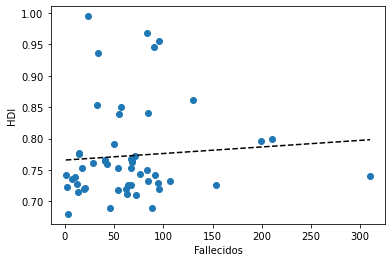

In [45]:
## REGRESION LINEAL DE FALLECIDOS VS HDI (RIQUEZA DE LA COMUNA)

x1 = DF_Final['TotalFallecidos']
y1 = DF_Final['HDI']

print(np.corrcoef(x1, y1))

plt.scatter(x1, y1, marker = 'o') 
plt.xlabel('Fallecidos')
plt.ylabel('HDI')
plt.plot(np.unique(x1), np.poly1d(np.polyfit(x1, y1, 1))(np.unique(x1)), 'r--',color='BLACK')
plt.show()

[[1.         0.49062117]
 [0.49062117 1.        ]]


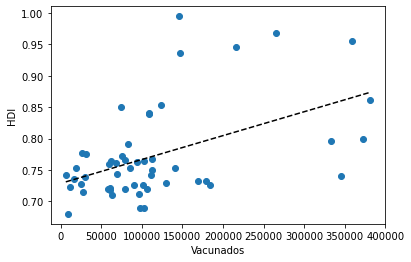

In [47]:
x1 = DF_Final['TotalVacunados']
y1 = DF_Final['HDI']

print(np.corrcoef(x1, y1))

plt.scatter(x1, y1, marker = 'o') 
plt.xlabel('Vacunados')
plt.ylabel('HDI')
plt.plot(np.unique(x1), np.poly1d(np.polyfit(x1, y1, 1))(np.unique(x1)), 'r--',color='Black')
plt.show()

In [52]:
model = sm.ols(formula = 'TotalFallecidos ~ TotalVacunados + HDI', data = DF_Final).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        TotalFallecidos   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     92.43
Date:                Mon, 12 Jul 2021   Prob (F-statistic):           2.35e-17
Time:                        22:46:01   Log-Likelihood:                -242.30
No. Observations:                  52   AIC:                             490.6
Df Residuals:                      49   BIC:                             496.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        242.9494     41.945      5.

In [ ]:
## El modelo de regresion nos dice que con un 79% (R^2 = 0,79) explica la variabilidad observada de los fallecimientos ## 
## por covid 19,es decir con un 78,2 el HDI y el Total de Vacunados explica en un 78,2% la variacion de los Fallecidos ##
## en la region metropolitana                                                                                          ##